<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/HW_HPTUNING_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMRON ROSADA<BR>
DATA SCIENCE<BR>
HYPERPARAMETER TUNING IN PYTHON

## share to pararawendy19@gmail.com

## `DATA UNDERSTANDING`

Mengeksplorasi data untuk mendapatkan wawasan awal serta memastikan kualitas data.

Memprediksi apakah pelanggan akan berhenti berlangganan (`Churn`) berdasarkan berbagai variabel yang mempengaruhi keputusan pelanggan dalam menggunakan layanan.

### **Deskripsi Variabel**  

Dataset memiliki **7.046** entri dan **12** kolom, termasuk:

| Nama Kolom         | Deskripsi |
|--------------------|-----------|
| **customerID**     | ID unik pelanggan |
| **Gender**         | Jenis kelamin pelanggan |
| **SeniorCitizen**  | Indikator apakah pelanggan adalah warga senior (1 = Ya, 0 = Tidak) |
| **Partner**        | Status apakah pelanggan memiliki pasangan (Yes/No) |
| **Dependents**     | Status apakah pelanggan memiliki tanggungan (Yes/No) |
| **Tenure**         | Lama berlangganan pelanggan dalam bulan |
| **Contract**       | Jenis kontrak pelanggan (Month-to-month, One year, Two year) |
| **PaperlessBilling** | Indikator apakah pelanggan menggunakan tagihan tanpa kertas (Yes/No) |
| **PaymentMethod**  | Metode pembayaran yang digunakan pelanggan |
| **MonthlyCharges** | Biaya bulanan yang dibayarkan pelanggan |
| **TotalCharges**   | Total biaya yang telah dibayarkan pelanggan selama berlangganan |
| **Churn**          | Indikator apakah pelanggan berhenti berlangganan (Yes/No) (`variabel target`)|

Variabel **Churn** merupakan target yang akan diprediksi.


In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# where is your data path
data_path = '/content/drive/My Drive/'

Mounted at /content/drive/


In [ ]:
#pd.set_option('display.max_colwidth', None)
file_name = data_path + 'churn - churn.csv'

In [ ]:
df = pd.read_csv(file_name)
df_churn = df.copy()
df_churn.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


- customerID → ID unik, bukan data yang digunakan untuk analisis. Bisa diabaikan atau dihapus jika tidak diperlukan.
- SeniorCitizen → Saat ini bertipe float64, padahal hanya memiliki dua nilai (0 atau 1). Seharusnya bertipe integer (int) atau kategori (category).
- Tenure → Bertipe float64, Lama berlangganan dalam bulan lebih cocok sebagai integer.

In [ ]:
df_churn['SeniorCitizen'] = pd.to_numeric(df_churn['SeniorCitizen'], errors="coerce").astype('Int64')
df_churn['Tenure'] = pd.to_numeric(df_churn['Tenure'], errors="coerce").astype('Int64')

In [ ]:
df_churn.dtypes

,0
customerID,object
Gender,object
SeniorCitizen,Int64
Partner,object
Dependents,object
Tenure,Int64
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64


In [ ]:
# Kategorik
kategorik = ['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Numerik (Int dan Float)
numerik = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

### Duplicate Handling

In [ ]:
len(df_churn.drop_duplicates()) / len(df_churn)

0.9980130570536475

(1−0.9980130570536475)×100=0.1987%≈0.2% sekitar 0.2% duplikat atau 7045−(7045×0.9980130570536475) = Jumlah Duplikat=7045−7031=14

In [ ]:
duplicates = df_churn[df_churn.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
858,4795-UXVCJ,Male,0,No,No,26,One year,No,Credit card (automatic),19.80,457.30,No
2350,5067-WJEUN,NaN,0,Yes,Yes,67,Two year,Yes,Bank transfer (automatic),54.20,3838.20,No
3314,3866-MDTUB,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.75,146.90,Yes
3393,8434-PNQZX,Female,0,No,No,42,Two year,Yes,Credit card (automatic),78.45,3373.40,No
3478,2921-XWDJH,Female,1,Yes,No,38,Month-to-month,Yes,Electronic check,83.45,3147.15,No
3652,3604-WLABM,Female,0,No,No,10,Month-to-month,No,Electronic check,54.25,583.00,No
3843,6418-HNFED,Male,0,Yes,No,51,Two year,Yes,Credit card (automatic),83.25,4089.45,No
4457,3606-SBKRY,Male,0,No,No,31,One year,Yes,Electronic check,50.05,1523.40,No
4875,5233-GEEAX,Male,1,No,No,8,Month-to-month,Yes,Electronic check,29.40,221.90,Yes
5835,2905-KFQUV,Female,0,Yes,No,2,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No


Terlihat bahwa ada beberapa customerID yang muncul lebih dari satu kali, yang seluruh baris dengan customerID yang sama memiliki nilai yang identik di semua kolom. berikut beberapa customerID yang muncul lebih dari satu kali:<br>
- 2905-KFQUV muncul di baris 5835 & 7032
- 9253-QXKBE muncul di baris 6039 & 7033
- 6418-HNFED muncul di baris 3843 & 7034
- 4795-UXVCJ muncul di baris 858 & 7035
- 5067-WJEUN muncul di baris 2350 & 7041
- Dan beberapa lainnya

Berarti Ini adalah duplikasi langsung yang kemungkinan terjadi karena kesalahan input atau penggabungan dataset lebih dari sekali. Karena ini adalah duplikasi langsung, solusi terbaik adalah menghapus baris duplikat yang identik dan **hanya menyisakan satu**.

In [ ]:
df_churn.duplicated(keep=False).sum()

28

Karena setiap pasangan duplikat dihitung dua kali dalam hasil **keep=False**. Jadi 28/2 = 14, jumlah baris tambahan yang benar-benar duplikat adalah 14.

In [ ]:
df_churn[df_churn.duplicated(keep=False)].sort_values(by=['customerID'])

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7039,2236-HILPA,Male,0,Yes,Yes,62,Two year,No,Credit card (automatic),20.65,1218.45,No
5915,2236-HILPA,Male,0,Yes,Yes,62,Two year,No,Credit card (automatic),20.65,1218.45,No
6567,2342-CKIAO,Female,0,No,No,2,Month-to-month,No,Mailed check,20.30,41.20,No
7040,2342-CKIAO,Female,0,No,No,2,Month-to-month,No,Mailed check,20.30,41.20,No
7032,2905-KFQUV,Female,0,Yes,No,2,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
5835,2905-KFQUV,Female,0,Yes,No,2,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
3478,2921-XWDJH,Female,1,Yes,No,38,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7044,2921-XWDJH,Female,1,Yes,No,38,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7045,3604-WLABM,Female,0,No,No,10,Month-to-month,No,Electronic check,54.25,583.00,No
3652,3604-WLABM,Female,0,No,No,10,Month-to-month,No,Electronic check,54.25,583.00,No


In [ ]:
# hapus baris duplikat yang identik dan hanya menyisakan satu.
df_churn = df_churn.drop_duplicates()

In [ ]:
print(df_churn.shape)

(7032, 12)


In [ ]:
print(df_churn.duplicated().sum())

0


Tidak ada duplikat lagi (0), artinya setiap customerID sekarang unik.

In [ ]:
duplicates = df_churn[df_churn.duplicated(keep=False)]
print("Baris dengan duplikat:")
display(duplicates)

Baris dengan duplikat:


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Nilai pada tabel `kosong` menandakan sudah tidak ada baris yang duplikat

### Missing Value Handling

In [ ]:
df_churn[df_churn.isna().any(axis=1)]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,NaN,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
26,6467-CHFZW,Male,0,Yes,Yes,47,Month-to-month,NaN,Electronic check,99.35,4749.15,Yes
116,9560-BBZXK,Female,0,No,No,<NA>,Two year,No,Bank transfer (automatic),31.05,1126.35,No
122,0404-SWRVG,Male,0,No,No,3,NaN,Yes,Electronic check,74.40,229.55,Yes
194,NaN,Male,0,Yes,Yes,59,Two year,No,Credit card (automatic),19.30,1192.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6726,7558-IMLMT,Male,0,Yes,NaN,67,Two year,Yes,Mailed check,20.80,1411.90,No
6753,7660-HDPJV,Female,0,NaN,No,1,Month-to-month,Yes,Electronic check,69.20,69.20,Yes
6821,9173-IVZVP,Female,0,Yes,Yes,53,Two year,No,Mailed check,NaN,1146.05,No
6896,1041-RXHRA,Female,0,No,No,41,Month-to-month,NaN,Bank transfer (automatic),70.25,2868.05,Yes


In [ ]:
df_churn[df_churn['Churn'].isna()].drop(columns=['customerID'])

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Pada kolom-kolom tersebut ada beberapa kolom yang terdapat `missing value` berikut nilai yang teridentifikasi:<br>
- Gender: `NaN`<br>
- SeniorCitizen: `<NaN>`<br>
- Partner: `NaN`<br>
- Dependents: `NaN`<br>
- Tenure: `<NaN>`<br>
- Contract: `NaN`<br>
- PaperlessBilling: `NaN`<br>
- PaymentMethod: `NaN`<br>
- MonthlyCharges: `NaN`<br>

In [ ]:
total_rows = len(df_churn)

for column in df_churn.columns:
   # if column != 'customerID':
        missing_count = df_churn[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'customerID' Has 9 missing values (0.13%)
Column 'Gender' Has 15 missing values (0.21%)
Column 'SeniorCitizen' Has 12 missing values (0.17%)
Column 'Partner' Has 16 missing values (0.23%)
Column 'Dependents' Has 19 missing values (0.27%)
Column 'Tenure' Has 17 missing values (0.24%)
Column 'Contract' Has 13 missing values (0.18%)
Column 'PaperlessBilling' Has 13 missing values (0.18%)
Column 'PaymentMethod' Has 11 missing values (0.16%)
Column 'MonthlyCharges' Has 10 missing values (0.14%)
Column 'TotalCharges' Has 0 missing values (0.00%)
Column 'Churn' Has 0 missing values (0.00%)


Terdapat missing values pada beberapa kolom diantaranya:<br>
- customerID: 9 missing values (0.13%)<br>
- Gender: 15 missing values (0.21%)<br>
- SeniorCitizen: 12 missing values (0.17%)<br>
- Partner: 16 missing values (0.23%)<br>
- Dependents: 19 missing values (0.27%)<br>
- Tenure: 17 missing values (0.24%)<br>
- Contract: 13 missing values (0.18%)<br>
- PaperlessBilling: 13 missing values (0.18%)<br>
- PaymentMethod: 11 missing values (0.16%)<br>
- MonthlyCharges: 10 missing values (0.14%)<Br>

Dalam statistik ketentuannya ialah `jika > 20%` maka di drop kolomnya, `jika <= 20%` maka akan di `handling` karena alasan distribusi data.

Aturan missing value handling :
1. jika tipe datanya `numerik` -> handling menggunakan `median` (robust / tahan terhadap outlier)
2. jika tipe datanya `kategorik / object / string` -> handling menggunakan `mode / modus` karena merepresentasikan kategori yang paling umum atau sering muncul sehingga dapat mempertahankan distribusi kategori.
3. Jika tipe datanya `datetime` -> handling dilakukan dengan menggunakan `median` sama seperti data numerik karena `datetime` dapat diurutkan secara alami artinya ada urutan waktu yang jelas: tahun, bulan, hari, jam, menit, detik. sehingga median dapat merepresentasikan nilai tengah lebih akurat.

**CustomerID** adalah identifier unik untuk setiap pelanggan, sehingga bukan variabel yang digunakan dalam analisis atau modeling. Terdapat 0.13%, baris dengan missing value akan dihapus untuk menjaga konsistensi data.


In [ ]:
df_churn = df_churn.dropna(subset=['customerID'])

In [ ]:
100 * df_churn[['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']].isna().sum() / len(df_churn)

,0
Gender,0.213584
SeniorCitizen,0.170867
Partner,0.227823
Dependents,0.270540
Tenure,0.242062
Contract,0.185106
PaperlessBilling,0.185106
PaymentMethod,0.156628
MonthlyCharges,0.142389


In [ ]:
df_churn[['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']].dtypes

,0
Gender,object
SeniorCitizen,Int64
Partner,object
Dependents,object
Tenure,Int64
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64


In [ ]:
# Menghitung median dari kolom numerik
median_df = df_churn[['SeniorCitizen', 'Tenure', 'MonthlyCharges']].median()
median_df

,0
SeniorCitizen,0.0
Tenure,29.0
MonthlyCharges,70.35


In [ ]:
# Menghitung modus dari kolom kategori
mode_df = df_churn[['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']].mode().iloc[0]
mode_df

,0
Gender,Male
Partner,No
Dependents,No
Contract,Month-to-month
PaperlessBilling,Yes
PaymentMethod,Electronic check


In [ ]:
# Mengisi missing value dengan median
df_churn[['SeniorCitizen', 'Tenure', 'MonthlyCharges']]= df_churn[['SeniorCitizen', 'Tenure', 'MonthlyCharges']].fillna(median_df)

<ipython-input-25-b6746c7a34e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn[['SeniorCitizen', 'Tenure', 'MonthlyCharges']]= df_churn[['SeniorCitizen', 'Tenure', 'MonthlyCharges']].fillna(median_df)


In [ ]:
# Mengisi missing value dengan modus
df_churn[['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']] = df_churn[['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']].fillna(mode_df)

<ipython-input-26-cf78d3264259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn[['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']] = df_churn[['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']].fillna(mode_df)


In [ ]:
df_churn.isna().sum().drop(columns=['customerID'])
#df_churn.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0


In [ ]:
#cek kembali apakah masih ada missing value
total_rows = len(df_churn)

for column in df_churn.columns:
    #if column != 'customerID':
        missing_count = df_churn[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'customerID' Has 0 missing values (0.00%)
Column 'Gender' Has 0 missing values (0.00%)
Column 'SeniorCitizen' Has 0 missing values (0.00%)
Column 'Partner' Has 0 missing values (0.00%)
Column 'Dependents' Has 0 missing values (0.00%)
Column 'Tenure' Has 0 missing values (0.00%)
Column 'Contract' Has 0 missing values (0.00%)
Column 'PaperlessBilling' Has 0 missing values (0.00%)
Column 'PaymentMethod' Has 0 missing values (0.00%)
Column 'MonthlyCharges' Has 0 missing values (0.00%)
Column 'TotalCharges' Has 0 missing values (0.00%)
Column 'Churn' Has 0 missing values (0.00%)


Setelah melakukan missing value handling, kolom-kolom sekarang memiliki 0 missing values `0.00%` yang berarti tidak ada nilai yang hilang di dalam dataset

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_churn, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_churn[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_churn[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_churn[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
numerik

['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

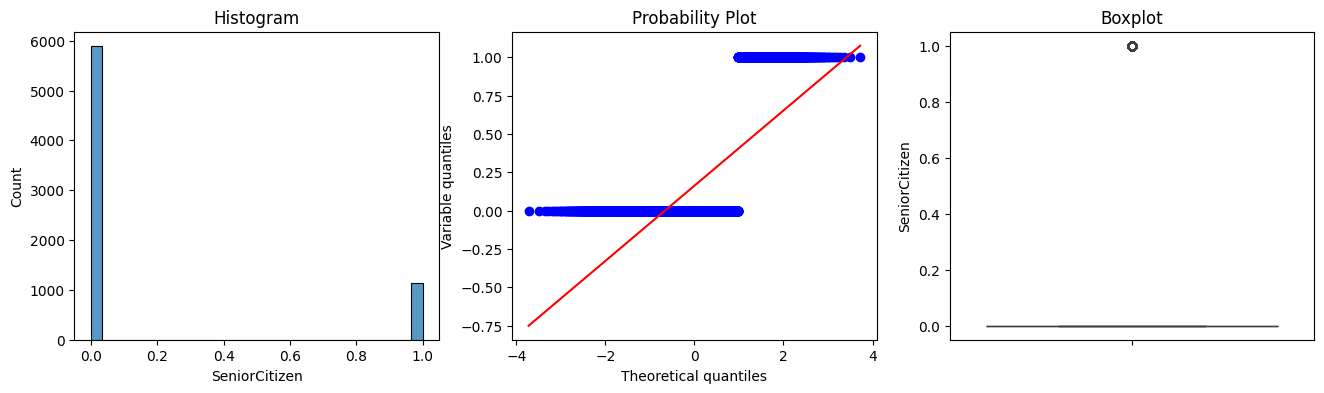

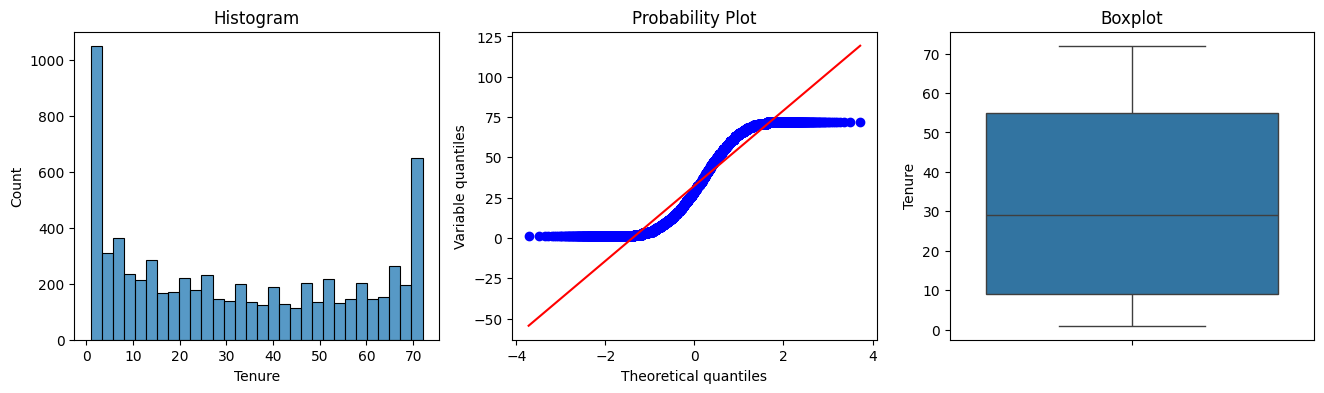

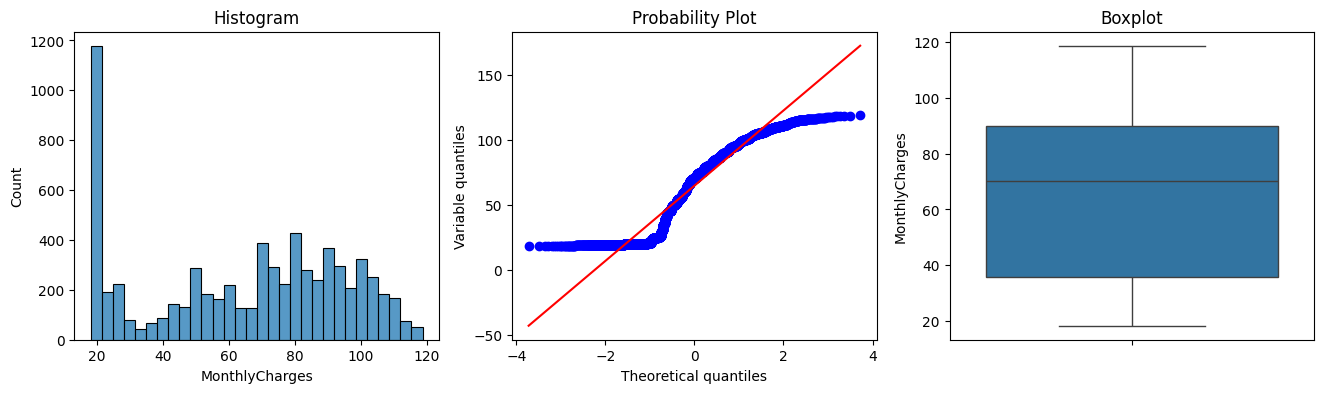

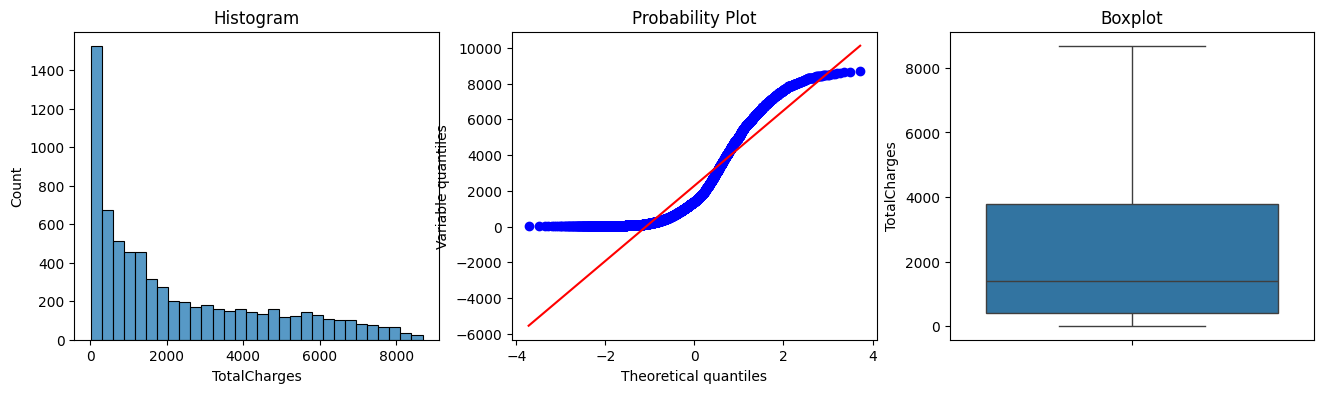

In [ ]:
# Memvisualisasikan outlier
for kolom in ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']:
    df_churn = df_churn.copy()
    check_plot(df_churn, kolom)

In [ ]:
def calc_outliers(df_churn, column):
    q1 = df_churn[column].quantile(0.25)
    q3 = df_churn[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df_churn[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df_churn[column].min():.2f}, Max: {df_churn[column].max():.2f}")

    outliers_upper = df_churn[df_churn[column] > upper_fence][column]
    outliers_lower = df_churn[df_churn[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

for col in columns_to_check:
    calc_outliers(df_churn, col)


[SeniorCitizen]
Q1: 0.00, Median: 0.00, Q3: 0.00
Upper Fence: 0.00, Lower Fence: 0.00
Min: 0.00, Max: 1.00
Outliers di atas Upper Fence: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
df_churn[['TotalCharges']].describe()

,TotalCharges
count,7023.000000
mean,2284.351837
std,2267.460913
min,18.800000
25%,401.400000
50%,1398.250000
75%,3798.375000
max,8684.800000


Dari hasil analisis pada kolom numerik, outlier tidak memiliki pengaruh signifikan terhadap distribusi data. Hanya terdapat 10 data outlier pada kolom **TotalCharges** dari total 5867 baris, sehingga data tetap digunakan tanpa perubahan. sedangkan Kolom SeniorCitizen berisi nilai biner (0 dan 1) dan tidak memiliki outlier

## `MODEL PREPARATION`

### Handling Data Categorical

In [ ]:
print("Kolom numerikal:", numerik, "\nKolom kategorikal:", kategorik)

Kolom numerikal: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'] 
Kolom kategorikal: ['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
df_churn[['Contract']].value_counts()

,count
Contract,
Month-to-month,3874
Two year,1681
One year,1468


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding untuk kategori ordinal
le = LabelEncoder()
label_cols = ['Contract', 'Churn']

for col in label_cols:
    df_churn[col] = le.fit_transform(df_churn[col])

# One-Hot Encoding untuk kategori nominal
kolom_ohe = ['Gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PaymentMethod']
df_churn = pd.get_dummies(df_churn, columns=kolom_ohe, drop_first=True, dtype=int)

posisi = [col for col in df_churn.columns if col != 'Churn'] + ['Churn']
df_churn = df_churn[posisi]

Jika `Churn` adalah fitur (bukan target), maka One-Hot Encoding akan lebih tepat karena tidak memiliki tingkatan. Namun, dalam kasus ini, Churn adalah target, jadi Label Encoding sudah cukup.

Karena penelitian akan menggunakan model regresi satu kategori dari setiap variabel kategorikal yang diencode dihapus untuk menghindari multikolinearitas menggunakan One-Hot Encoding dengan **drop_first=True**.

In [ ]:
df_churn.sample(5)

,customerID,SeniorCitizen,Tenure,Contract,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
86,4808-YNLEU,0,35,1,62.15,2215.45,0,1,0,1,0,0,0,0
5059,5018-LXQQG,0,30,0,66.30,1923.50,0,1,1,0,0,0,0,0
2534,2050-ONYDQ,0,65,2,26.00,1654.85,0,1,1,0,1,0,0,0
5795,1555-HAPSU,0,71,2,23.90,1663.50,0,1,1,0,1,0,0,0
1291,6248-TKCQV,0,70,2,80.60,5460.20,0,1,1,1,0,0,0,0


### Feature Scaling

Feature scaling digunakan untuk menyamakan skala fitur yang memiliki rentang nilai yang berbeda. Karena Logistic Regression sensitif terhadap perbedaan skala antar fitur, maka penggunaan feature scaling sangat disarankan agar model dapat bekerja dengan optimal.

Metode feature scaling yang umum digunakan adalah MinMaxScaler dan StandardScaler. Dalam kasus ini, `StandardScaler` dipilih karena data memiliki skala yang berbeda dan kemungkinan ada outlier, sehingga lebih stabil tanpa terlalu dipengaruhi nilai ekstrem.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitur yang di-scaling
features_to_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# cek jika ada missing value
display(df_churn[features_to_scale].isnull().sum())

,0
Tenure,0
MonthlyCharges,0
TotalCharges,0


In [ ]:
# Melakukan scaling
df_churn[features_to_scale] = scaler.fit_transform(df_churn[features_to_scale])

In [ ]:
df_churn.sample(2)

,customerID,SeniorCitizen,Tenure,Contract,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4588,2432-TFSMK,0,-0.587699,1,0.823811,-0.287281,1,0,0,1,1,0,0,0
6695,3733-ZEECP,0,-0.424567,0,-0.457272,-0.463746,1,1,1,1,0,1,0,0


###  Feature Correlation Matrix

In [ ]:
df_churn.describe().fillna(0)

,SeniorCitizen,Tenure,Contract,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
count,7023.0,7.023000e+03,7023.000000,7.023000e+03,7.023000e+03,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000
mean,0.161897,-5.564552e-17,0.687740,-6.019834e-17,-3.389318e-17,0.506194,0.481703,0.297736,0.593194,0.215862,0.337463,0.227823,0.265698
std,0.368382,1.000071e+00,0.832806,1.000071e+00,1.000071e+00,0.499997,0.499701,0.457295,0.491273,0.411448,0.472878,0.419458,0.441736
min,0.0,-1.281011e+00,0.000000,-1.550351e+00,-9.992292e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,-9.547466e-01,0.000000,-9.680412e-01,-8.304822e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,-1.390852e-01,0.000000,1.832693e-01,-3.908182e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,9.212747e-01,1.000000,8.329612e-01,6.677650e-01,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.0,1.614587e+00,2.000000,1.793773e+00,2.822939e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr = df_churn.drop(columns=['customerID']).corr()

In [ ]:
corr

,SeniorCitizen,Tenure,Contract,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.013753,-0.142488,0.221233,0.102423,-0.003512,0.017255,-0.209249,0.156229,-0.022958,0.171108,-0.153021,0.150437
Tenure,0.013753,1.000000,0.675861,0.248408,0.825789,0.005577,0.380069,0.162034,0.004674,0.231635,-0.209253,-0.231750,-0.354005
Contract,-0.142488,0.675861,1.000000,-0.072045,0.449741,0.000712,0.293397,0.239296,-0.176518,0.211703,-0.341706,-0.006679,-0.395750
MonthlyCharges,0.221233,0.248408,-0.072045,1.000000,0.650646,-0.014562,0.097602,-0.112136,0.350206,0.029612,0.271029,-0.375700,0.193155
TotalCharges,0.102423,0.825789,0.449741,0.650646,1.000000,0.000030,0.317658,0.063762,0.157267,0.181795,-0.059571,-0.294348,-0.199508
Gender_Male,-0.003512,0.005577,0.000712,-0.014562,0.000030,1.000000,-0.001399,0.010307,-0.012061,0.001115,0.000795,0.014320,-0.008097
Partner_Yes,0.017255,0.380069,0.293397,0.097602,0.317658,-0.001399,1.000000,0.451052,-0.013212,0.082244,-0.083552,-0.096971,-0.148940
Dependents_Yes,-0.209249,0.162034,0.239296,-0.112136,0.063762,0.010307,0.451052,1.000000,-0.109898,0.060272,-0.146617,0.056144,-0.163257
PaperlessBilling_Yes,0.156229,0.004674,-0.176518,0.350206,0.157267,-0.012061,-0.013212,-0.109898,1.000000,-0.012880,0.208503,-0.204636,0.191684
PaymentMethod_Credit card (automatic),-0.022958,0.231635,0.211703,0.029612,0.181795,0.001115,0.082244,0.060272,-0.012880,1.000000,-0.374455,-0.284992,-0.134611


In [ ]:
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale='Blues',
    title="Correlation Heatmap")
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=24, family='Arial', color='white'),
    autosize=True,
    width=1400,
    height=1200,
    xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(xgap=1,  ygap=1)
fig.show()

**Tenure** dan **TotalCharges** memiliki korelasi 0.83, yang lebih besar dari 0.8, sehingga salah satu dari keduanya akan dihapus untuk mengurangi multikolinearitas.
Selain itu, fitur lain seperti SeniorCitizen, Gender_Male, Partner_Yes, dan Dependents_Yes memiliki korelasi rendah dengan target Churn (di bawah 0.3). Sebelum menentukan apakah salah satu perlu dihapus, analisis lebih lanjut akan dilakukan untuk memastikan dampaknya terhadap prediksi churn.

###  Feature Selection

VIF (Variance Inflation Factor) digunakan untuk mendeteksi multikolinearitas dalam model regresi, termasuk logistic regression. Menambahkan konstanta dalam perhitungan VIF memastikan stabilitas regresi dan akurasi dalam mendeteksi multikolinearitas.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [ ]:
# Pilih hanya fitur independen (tanpa CustomerID dan Churn)
X = df_churn.drop(columns=['customerID', 'Churn'])

In [ ]:
X = add_constant(X)

Konversi ke float sebelum menghitung VIF untuk menghindari error akibat tipe data campuran (int32, Int64, dll.).

In [ ]:
X = X.astype(float)

In [ ]:
X

,const,SeniorCitizen,Tenure,Contract,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,-1.281011,0.0,-1.164363,-0.994356,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.064830,1.0,-0.262614,-0.174151,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,-1.240228,0.0,-0.365766,-0.959821,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.513444,1.0,-0.750091,-0.195652,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,-1.240228,0.0,0.194916,-0.940635,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,-0.343001,1.0,0.664091,-0.129604,1.0,1.0,1.0,1.0,0.0,0.0,1.0
7028,1.0,0.0,1.614587,1.0,1.276349,2.239911,0.0,1.0,1.0,1.0,1.0,0.0,0.0
7029,1.0,0.0,-0.873180,0.0,-1.172682,-0.854718,0.0,1.0,1.0,1.0,0.0,1.0,0.0
7030,1.0,1.0,-1.158662,0.0,0.318033,-0.872294,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

In [ ]:
vif_data

,Feature,VIF
0,const,10.884365
1,SeniorCitizen,1.131242
2,Tenure,7.333158
3,Contract,2.238879
4,MonthlyCharges,3.929694
5,TotalCharges,9.710705
6,Gender_Male,1.001075
7,Partner_Yes,1.456714
8,Dependents_Yes,1.373303
9,PaperlessBilling_Yes,1.189250


In [ ]:
vif_data = vif_data[vif_data["Feature"] != "const"]
vif_data

,Feature,VIF
1,SeniorCitizen,1.131242
2,Tenure,7.333158
3,Contract,2.238879
4,MonthlyCharges,3.929694
5,TotalCharges,9.710705
6,Gender_Male,1.001075
7,Partner_Yes,1.456714
8,Dependents_Yes,1.373303
9,PaperlessBilling_Yes,1.189250
10,PaymentMethod_Credit card (automatic),1.560846


**TotalCharges** dan **Tenure** memiliki VIF tinggi (9.710705 dan 7.333158) serta korelasi 0.83 (>0.8), menunjukkan multikolinearitas signifikan. TotalCharges akan dihapus karena VIF-nya lebih tinggi dan korelasi dengan Tenure sangat kuat.

In [ ]:
X = X.drop(columns=['TotalCharges'])

In [ ]:
# Cek kembali apakah nilai VIF fitur lain menurun.

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data["Feature"] != "const"]
vif_data

,Feature,VIF
1,SeniorCitizen,1.130733
2,Tenure,2.476296
3,Contract,2.238678
4,MonthlyCharges,1.477009
5,Gender_Male,1.001006
6,Partner_Yes,1.456418
7,Dependents_Yes,1.373054
8,PaperlessBilling_Yes,1.188801
9,PaymentMethod_Credit card (automatic),1.560132
10,PaymentMethod_Electronic check,1.940710


Setelah menghapus **TotalCharges**, nilai VIF turun secara signifikan. Sekarang, tidak ada fitur dengan VIF di atas 5, yang berarti multikolinearitas sudah dalam batas yang aman.

### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_churn.drop(columns=['Churn', 'customerID', 'TotalCharges'])  # Hanya fitur independen
y = df_churn['Churn']  # Hanya target

In [ ]:
X.head(2)

,SeniorCitizen,Tenure,Contract,MonthlyCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.281011,0,-1.164363,0,0,0,1,0,1,0
1,0,0.064830,1,-0.262614,1,0,0,0,0,0,1


In [ ]:
y.sample(2)

,Churn
5252,0
3823,1


In [ ]:
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Bagi Validation dan Test (masing-masing 10%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_valid, y_test_valid, test_size=0.50, random_state=42)

`X_test_valid` hanya sebagai langkah sementara, tidak digunakan langsung, membantu memisahkan data validasi dan test. 80% data digunakan untuk training. Dari 20% sisa data, di bagi lagi menjadi: 10% untuk validasi (50% dari 20%), 10% untuk test (50% dari 20%).

In [ ]:
X_train.shape, X_validation.shape, X_test.shape

((5618, 11), (702, 11), (703, 11))

In [ ]:
X.columns

Index(['SeniorCitizen', 'Tenure', 'Contract', 'MonthlyCharges', 'Gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## `MODEL TRAINING`

Model regresi adalah salah satu metode dalam machine learning yang digunakan untuk memprediksi nilai numerik berdasarkan hubungan antara variabel independen dan dependen. Dalam analisis churn, digunakan Logistic Regression karena mampu memodelkan probabilitas kejadian biner (churn atau tidak churn) dengan output antara 0 dan 1.

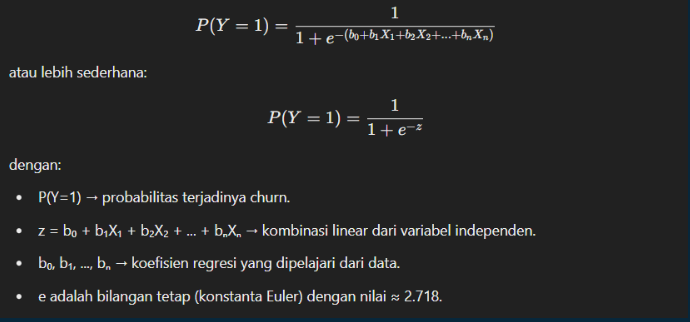

Untuk mencegah overfitting, digunakan Lasso (L1) dan Ridge (L2) Regularization:
- Lasso (L1) mengecilkan beberapa koefisien hingga nol, sehingga berfungsi sebagai seleksi fitur.
- Ridge (L2) mengecilkan koefisien tanpa menghapus fitur, menjaga kestabilan model saat ada multikolinearitas.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
# convert to numpy (array)
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

Semakin besar lambda (regularisasi kuat), semakin kecil C dan sebaliknya. Jadi, menggunakan lambdas untuk pengujian, tapi harus dikonversi ke C.

In [ ]:
# === Tuning for Lasso (L1) ===
lasso_param_grid = {
    'C': [1/0.01, 1/0.1, 1/1, 1/10], # konversi ke C
    'penalty': ['l1'],
    'solver': ['liblinear']
}

In [ ]:
# === Tuning for Ridge (L2) ===
ridge_param_grid = {
    'C': [1/0.01, 1/0.1, 1/1, 1/10], # konversi ke C
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [ ]:
lasso_model = LogisticRegression(random_state=42)
lasso_grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=lasso_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1)
lasso_grid_search.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [100.0, 10.0, 1.0, 0.1], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
cv_results_lasso = pd.DataFrame(lasso_grid_search.cv_results_)
retain_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_results_lasso = cv_results_lasso[retain_cols]
cv_results_lasso

,params,mean_test_score,rank_test_score
0,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.792985,2
1,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.792807,4
2,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.792807,3
3,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.793874,1


In [ ]:
# Best parameters and best score for Lasso
print("Best parameters for Lasso:", lasso_grid_search.best_params_)
print("Best score for Lasso:", lasso_grid_search.best_score_)

Best parameters for Lasso: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Lasso: 0.7938742818391257


In [ ]:
# Pilih model terbaik dari GridSearchCV (Lasso)
best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_model.fit(X_churn_train, y_churn_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
# === Tuning for Ridge (L2) ===
ridge_model = LogisticRegression(random_state=42)
ridge_grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)
ridge_grid_search.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [100.0, 10.0, 1.0, 0.1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [ ]:
cv_results_ridge = pd.DataFrame(ridge_grid_search.cv_results_)
retain_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_results_ridge = cv_results_ridge[retain_cols]
cv_results_ridge

,params,mean_test_score,rank_test_score
0,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.792985,1
1,"{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.792985,1
2,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.792629,3
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.792273,4


GridSearchCV memberikan peringkat yang sama untuk hasil dengan skor yang sama, sehingga peringkat berikutnya dilewati. Misalnya, jika ada dua peringkat 1, peringkat berikutnya akan jadi 3, bukan 2.

In [ ]:
# Best parameters and best score for Ridge
print("Best parameters for Ridge:", ridge_grid_search.best_params_)
print("Best score for Ridge:", ridge_grid_search.best_score_)

Best parameters for Ridge: {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for Ridge: 0.792985235911688


In [ ]:
# Pilih model terbaik dari GridSearchCV (Ridge)
best_ridge_model = ridge_grid_search.best_estimator_
print(best_ridge_model.get_params())
best_ridge_model.fit(X_churn_train, y_churn_train)

{'C': 100.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


LogisticRegression(C=100.0, random_state=42)

Python hanya menampilkan parameter yang diatur secara eksplisit dan berbeda dari default. **Ridge** tidak tampilkan penalty='l2' dan solver='lbfgs' karena itu default. Lasso tampilkan penalty='l1' dan solver='liblinear' karena bukan default.

In [ ]:
best_lasso_model.coef_

array([[ 0.30059438, -0.89018843, -0.76042684,  0.68733208,  0.        ,
         0.        , -0.22365209,  0.37470203, -0.00878942,  0.46344065,
        -0.00919914]])

In [ ]:
lasso_coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + X_train.columns.tolist(),
    'Coefficient': [best_lasso_model.intercept_[0]] + best_lasso_model.coef_.flatten().tolist()
})
lasso_coef_df

,Feature,Coefficient
0,Intercept,-1.397111
1,SeniorCitizen,0.300594
2,Tenure,-0.890188
3,Contract,-0.760427
4,MonthlyCharges,0.687332
5,Gender_Male,0.000000
6,Partner_Yes,0.000000
7,Dependents_Yes,-0.223652
8,PaperlessBilling_Yes,0.374702
9,PaymentMethod_Credit card (automatic),-0.008789


In [ ]:
best_ridge_model.coef_

array([[ 0.37798888, -0.94569185, -0.73635784,  0.69709429,  0.00499091,
         0.01192866, -0.25706889,  0.46269349, -0.09113299,  0.46684231,
        -0.07198616]])

In [ ]:
ridge_coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + X_train.columns.tolist(),
    'Coefficient': [best_ridge_model.intercept_[0]] + best_ridge_model.coef_.flatten().tolist()
})
ridge_coef_df

,Feature,Coefficient
0,Intercept,-1.493760
1,SeniorCitizen,0.377989
2,Tenure,-0.945692
3,Contract,-0.736358
4,MonthlyCharges,0.697094
5,Gender_Male,0.004991
6,Partner_Yes,0.011929
7,Dependents_Yes,-0.257069
8,PaperlessBilling_Yes,0.462693
9,PaymentMethod_Credit card (automatic),-0.091133


- Lasso → Penalti (L1) mengubah beberapa koefisien menjadi 0, fitur yang tersisa tetap berpengaruh. Semakin besar nilai absolut koefisien, semakin besar pengaruh fitur terhadap prediksi.
- Ridge → Penalti (L2) mengecilkan bobot semua fitur tanpa mengubahnya jadi 0. Semakin besar nilai absolut koefisien, semakin besar pengaruh fitur terhadap prediksi.

Intercept = bias model saat semua fitur nol.
- Negatif → Cenderung prediksi 0 (tidak churn).
- Positif → Cenderung prediksi 1 (churn).

### Model Training Evaluation

In [ ]:
# Prediksi Evaluasi Model training Lasso
y_pred_lasso_best = best_lasso_model.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model Lasso ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_lasso_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_lasso_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_lasso_best))



=== Evaluasi Model Lasso ===
Accuracy: 0.7678062678062678
Confusion Matrix:
 [[453  64]
 [ 99  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       517
           1       0.57      0.46      0.51       185

    accuracy                           0.77       702
   macro avg       0.70      0.67      0.68       702
weighted avg       0.76      0.77      0.76       702



In [ ]:
# Prediksi Evaluasi Model training Ridge
y_pred_ridge_best = best_ridge_model.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model Ridge ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_ridge_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_ridge_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_ridge_best))


=== Evaluasi Model Ridge ===
Accuracy: 0.7706552706552706
Confusion Matrix:
 [[453  64]
 [ 97  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       517
           1       0.58      0.48      0.52       185

    accuracy                           0.77       702
   macro avg       0.70      0.68      0.69       702
weighted avg       0.76      0.77      0.76       702



In [ ]:
print(np.array_equal(y_pred_lasso_best, y_pred_ridge_best))

False


### Model Training Validation

Cross-Validation (`CV`) untuk memastikan hasil lebih stabil dan tidak overfitting pada data validasi. Data dipecah menjadi beberapa fold (misalnya 5 fold jika cv=5): Proses diulang hingga semua fold pernah menjadi data validasi. Hasilnya adalah mean score dari akurasi setiap fold. Tujuannya untuk melihat performa model secara konsisten.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-Validation untuk Lasso
cv_scores_lasso = cross_val_score(best_lasso_model, X_churn_train, y_churn_train, cv=5)
print("\nLasso Cross-Validation Scores:", cv_scores_lasso)
print("Mean CV Score:", cv_scores_lasso.mean())


Lasso Cross-Validation Scores: [0.78558719 0.80516014 0.80516014 0.79162956 0.78183437]
Mean CV Score: 0.7938742818391257


In [ ]:
# Cross-Validation untuk Ridge
cv_scores_ridge = cross_val_score(best_ridge_model, X_churn_train, y_churn_train, cv=5)
print("\nRidge Cross-Validation Scores:", cv_scores_ridge)
print("Mean CV Score:", cv_scores_ridge.mean())


Ridge Cross-Validation Scores: [0.78380783 0.80071174 0.80338078 0.79073909 0.78628673]
Mean CV Score: 0.792985235911688


## `TRAINING INTERPRETATION`

### Perbandingan Confusion Matrix pada Model Training

|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | TN           | FP           |
| **Actual 1** | FN           | TP           |

| **Model**  | **Actual** | **Predicted 0** | **Predicted 1** |
|------------|-----------|-----------------|-----------------|
| **Lasso**  | **0**     | 453             | 64              |
|            | **1**     | 99              | 86              |
| **Ridge**  | **0**     | 453             | 64              |
|            | **1**     | 97              | 88              |

- Lasso menghasilkan TP = 86 dan FN = 99, menunjukkan masih banyak churn yang diklasifikasikan sebagai tidak churn.
- Ridge sedikit lebih baik dengan TP = 88 dan FN = 97, tetapi masih memiliki jumlah False Negative yang tinggi.

Kedua model memiliki prediksi yang cukup seimbang untuk kelas 0 (tidak churn), tetapi masih kesulitan dalam mengidentifikasi kelas 1 (churn).

### Perbandingan Accuracy pada Model Training

| **Model**  | **Accuracy (Decimal)** | **Accuracy (%)** |
|------------|--------------------|--------------|
| **Lasso**  | 0.7678             | 76.78%       |
| **Ridge**  | 0.7707             | 77.07%       |

Ridge memiliki Accuracy lebih tinggi (77.07%) dibandingkan Lasso (76.78%). Perbedaannya kecil. Kedua model menunjukkan performa cukup baik, tetapi pemilihan terbaik perlu mempertimbangkan metrik lain seperti Precision dan Recall untuk evaluasi lebih menyeluruh.

### Perbandingan Classification Report pada Model Training

| **Model**  | **Class** | **Precision** | **Recall** | **F1-Score** | **Support** |
|------------|----------|--------------|-----------|-------------|------------|
| **Lasso**  | 0        | 0.82         | 0.88      | 0.85        | 517        |
|            | 1        | 0.57         | **0.46**  | 0.51        | 185        |
|            | **Accuracy** |            |           | **0.77**    | 702        |
|            | **Macro Avg** | 0.70      | 0.67      | 0.68        | 702        |
|            | **Weighted Avg** | 0.76  | 0.77      | 0.76        | 702        |
| **Ridge**  | 0        | 0.82         | 0.88      | 0.85        | 517        |
|            | 1        | 0.58         | **0.48**  | 0.52        | 185        |
|            | **Accuracy** |            |           | **0.77**    | 702        |
|            | **Macro Avg** | 0.70      | 0.68      | 0.69        | 702        |
|            | **Weighted Avg** | 0.76  | 0.77      | 0.76        | 702        |


Fokus utama adalah **Recall** untuk kelas 1 karena tujuan utamanya mendeteksi churn.
- Lasso dan Ridge memiliki akurasi yang sama (0.77), namun Ridge memiliki recall kelas 1 lebih tinggi (0.48) dibanding Lasso (0.46).
- Precision untuk kelas 1 sedikit lebih tinggi pada Ridge (0.58) dibanding Lasso (0.57), yang berarti Ridge lebih baik dalam meminimalkan False Positive.

Secara keseluruhan, Ridge lebih unggul dibanding Lasso dalam mendeteksi churn karena memiliki recall yang lebih tinggi, meskipun selisihnya kecil.

### Perbandingan Cross-Validation Scores pada Model Training

| Model  | CV Fold 1 | CV Fold 2 | CV Fold 3 | CV Fold 4 | CV Fold 5 | Mean CV Score |
|--------|-----------|-----------|-----------|-----------|-----------|---------------|
| **Lasso** | 0.7855    | 0.8051    | 0.8051    | 0.7916    | 0.7818    | **0.7938**    |
| **Ridge** | 0.7838    | 0.8007    | 0.8033    | 0.7907    | 0.7862    | **0.7929**    |

Lasso dan Ridge memiliki performa yang hampir sama dengan mean CV score masing-masing 0.7938 dan 0.7929, menunjukkan bahwa kedua model memiliki generalisasi yang baik.
Lasso sedikit lebih unggul dibanding Ridge, meskipun selisihnya sangat kecil (0.0009).

Secara keseluruhan, pada model training, Ridge lebih unggul dibanding Lasso untuk deteksi churn karena recall lebih tinggi dan prediksi churn lebih baik, meskipun selisihnya kecil.

## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
# Periksa ukuran masing-masing set
X_train.shape, X_validation.shape, X_test.shape

((5618, 11), (702, 11), (703, 11))

In [ ]:
# convert to numpy (array)
# training
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

# pengujian (x_test)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(len(y_test),)

### Model Test Evaluation

In [ ]:
# Prediksi Evaluasi Model test Lasso
y_pred_lasso_test = best_lasso_model.predict(X_test)

print("\n=== Evaluasi Model Lasso pada Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lasso_test))
print("Classification Report:\n", classification_report(y_test, y_pred_lasso_test))


=== Evaluasi Model Lasso pada Test Set ===
Accuracy: 0.7809388335704125
Confusion Matrix:
 [[468  56]
 [ 98  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       524
           1       0.59      0.45      0.51       179

    accuracy                           0.78       703
   macro avg       0.71      0.67      0.69       703
weighted avg       0.77      0.78      0.77       703



In [ ]:
# Prediksi Evaluasi Model test Ridge
y_pred_ridge_test = best_ridge_model.predict(X_test)

print("\n=== Evaluasi Model Ridge pada Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge_test))
print("Classification Report:\n", classification_report(y_test, y_pred_ridge_test))


=== Evaluasi Model Ridge pada Test Set ===
Accuracy: 0.7809388335704125
Confusion Matrix:
 [[468  56]
 [ 98  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       524
           1       0.59      0.45      0.51       179

    accuracy                           0.78       703
   macro avg       0.71      0.67      0.69       703
weighted avg       0.77      0.78      0.77       703



In [ ]:
np.array_equal(y_pred_lasso_test, y_pred_ridge_test)

True

In [ ]:
np.array_equal(X_valid, X_test)

False

### Model Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_best_lasso_model = cross_val_score(best_lasso_model, X_test, y_test, cv=5)
print("\nLasso Cross-Validation Scores on Test Data:", cv_scores_best_lasso_model)
print("Mean CV Score on Test Data:", cv_scores_best_lasso_model.mean())


Lasso Cross-Validation Scores on Test Data: [0.80851064 0.85106383 0.74468085 0.79285714 0.77142857]
Mean CV Score on Test Data: 0.7937082066869301


In [ ]:
cv_scores_best_ridge_model = cross_val_score(best_ridge_model, X_test, y_test, cv=5)
print("\nRidge Cross-Validation Scores on Test Data:", cv_scores_best_ridge_model)
print("Mean CV Score on Test Data:", cv_scores_best_ridge_model.mean())


Ridge Cross-Validation Scores on Test Data: [0.81560284 0.80851064 0.78723404 0.77142857 0.79285714]
Mean CV Score on Test Data: 0.795126646403242


## `EVALUATION INTERPRETATION`

### Perbandingan Confusion Matrix pada Data Test


| **Model**  | **Actual** | **Predicted 0** | **Predicted 1** |
|------------|-----------|-----------------|-----------------|
| **Lasso**  | **0**     | 468             | 56              |
|            | **1**     | 98              | 81              |
| **Ridge**  | **0**     | 468             | 56              |
|            | **1**     | 98              | 81              |


Kedua model menghasilkan prediksi yang identik pada dataset uji. Lasso dan Ridge menghasilkan TP = 81 dan FN = 98, menunjukkan masih banyak churn yang diklasifikasikan sebagai tidak churn. Kesamaan hasil ini menunjukkan bahwa meskipun pendekatan regularisasi berbeda (L1 pada Lasso dan L2 pada Ridge), parameter optimal yang dipilih dari **GridSearchCV** menghasilkan model dengan kemampuan klasifikasi yang setara pada dataset uji.

### Perbandingan Accuracy pada Data Test

|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | TN           | FP           |
| **Actual 1** | FN           | TP           |

| **Model**  | **Accuracy (Decimal)** | **Accuracy (%)** |
|------------|------------------------|------------------|
| **Lasso**  | 0.7809                 | 78.09%           |
| **Ridge**  | 0.7809                 | 78.09%           |

Lasso dan Ridge memiliki Accuracy yang sama yaitu 78.09%.

### Perbandingan Classification Report pada Data Test

| **Model**  | **Class** | **Precision** | **Recall** | **F1-Score** | **Support** |
|------------|----------|--------------|-----------|-------------|------------|
| **Lasso**  | 0        | 0.83         | 0.89      | 0.86        | 524        |
|            | 1        | 0.59         | **0.45**     | 0.51        | 179        |
|            | **Accuracy** |            |           | **0.78**    | 703        |
|            | **Macro Avg** | 0.71      | 0.67      | 0.69        | 703        |
|            | **Weighted Avg** | 0.77  | 0.78      | 0.77        | 703        |
| **Ridge**  | 0        | 0.83         | 0.89      | 0.86        | 524        |
|            | 1        | 0.59         | **0.45**      | 0.51        | 179        |
|            | **Accuracy** |            |           | **0.78**    | 703        |
|            | **Macro Avg** | 0.71      | 0.67      | 0.69        | 703        |
|            | **Weighted Avg** | 0.77  | 0.78      | 0.77        | 703        |


Lasso dan Ridge menghasilkan akurasi 0.78 dan nilai Recall kelas 1 sebesar 0.45, kedua model memiliki performa yang sama dalam mendeteksi churn. Precision untuk kelas 1 juga sama (0.59), yang berarti tingkat False Positive kedua model setara. Karena tidak ada perbedaan dalam metrik utama, kedua model memiliki efektivitas yang sama dalam mengklasifikasikan churn dan non-churn

### Perbandingan Cross-Validation Scores pada Data Test

| **Model**  | **CV Fold 1** | **CV Fold 2** | **CV Fold 3** | **CV Fold 4** | **CV Fold 5** | **Mean CV Score** |
|------------|-------------|-------------|-------------|-------------|-------------|-----------------|
| **Lasso**  | 0.8085      | 0.8511      | 0.7447      | 0.7929      | 0.7714      | **0.7937**      |
| **Ridge**  | 0.8156      | 0.8085      | 0.7872      | 0.7714      | 0.7929      | **0.7951**      |

**Ridge** memiliki mean CV score lebih tinggi (0.7951) dibandingkan Lasso (0.7937), meskipun selisihnya sangat kecil (0.0014). Kedua model menunjukkan performa yang hampir setara dengan kemampuan generalisasi yang baik.